In [1]:
import pandas as pd
import numpy as np
import PrepDataHelper as helper
import pymc3 as pm
import pymc3_models as models

In [2]:
physio_file='full_logfile_scr_0.csv'
df = pd.read_csv(physio_file)
df=df.drop(df.loc[df.rt_fear>df.rt_fear.mean()+3*df.rt_fear.std()].index)
#recoded for negative valence is closer to one
df['hp_change_video']=df['video_hp']-df['base_ECG']
df['scr_change_video']=df['video_scr']-df['base_scr']
#take away participants who completed less than 12 trials
df = helper.TakeAwayGroupsLessThenX(df, min_groups=12)

In [4]:
standardized_fear_scr_hp  = df[['hp_change_video','participant_num','scr_change_video','resp_fear']].groupby('participant_num').transform(lambda x: (x - x.mean()) / x.std())
standardized_df = pd.concat([standardized_fear_scr_hp, df[['participant_num','video_condition']]], axis=1)
standardized_df = standardized_df.loc[df.video_condition.isin([1,2,3])]
full_df = standardized_df

In [5]:
#define models
y = 'resp_fear'
situation_subj_model_scr = models.RegressOnePredictor_SituationSubjectHierarchical(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y,
    'scr_change_video')

subj_hierarchical_model_scr = models.RegressOnePredictor_SubjectHierarchical(
    full_df[['scr_change_video','resp_fear','participant_num']],
    y,
    'scr_change_video')

flat_model_scr = models.RegressOnePredictor(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y,
    'scr_change_video')

situation_model_scr = models.RegressOnePredictor_Situation(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y,
    'scr_change_video')

participant_model_scr = models.RegressOnePredictor_Idiographic(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y,
    'scr_change_video')

independent_situation_participant_scr =models.RegressOnePredictor_SituationSubjectIndependent(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y,
    'scr_change_video')

meanmodel_scr = models.MeanModel(
    full_df[['scr_change_video','resp_fear','participant_num','video_condition']],
    y)

3


/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, mu_b, beta_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 13 seconds.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, b, beta_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 17 seconds.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, b_offset, beta_offset_scr_change_video, sigma_b, mu_b, sd_scr_change_video, mu_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 36 seconds.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, b_offset, beta_offset_scr_change_video, sigma_b, mu_b, sd_scr_change_video, mu_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 83 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, b, beta_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 29 seconds.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, eps, mu_b, beta_scr_change_video]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 66 seconds.
/Users/mcveigh.k/Desktop/code/Git_Repos/AffVids_physio_2/HierarchicalModels/pymc3_models.py:333: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples, cores=cores, target_accept=target_accept, tune=tune)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, mu]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 14 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.

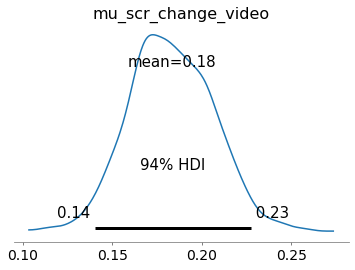

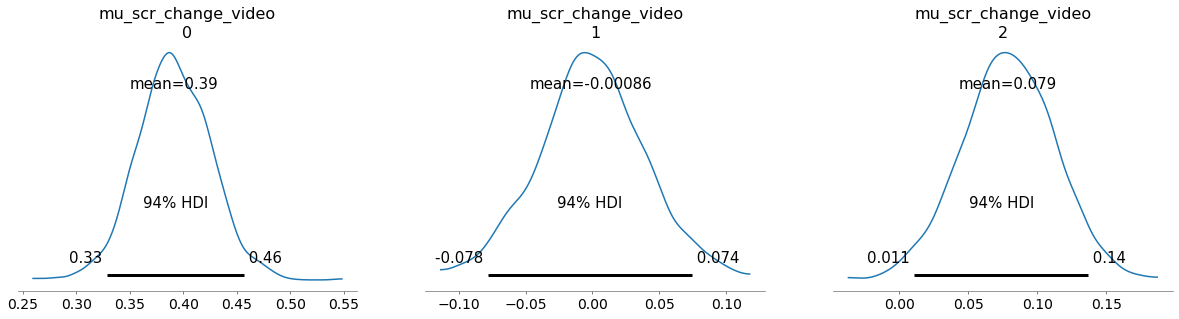

In [6]:
n_samples = 10000

# sample models
flat_model_trace_scr = models.SampleModel(flat_model_scr, n_samples)
situation_model_trace_scr = models.SampleModel(situation_model_scr, n_samples)
subj_hierarchical_model_trace_scr = models.SampleModel(subj_hierarchical_model_scr, n_samples)
situation_subj_model_trace_scr = models.SampleModel(situation_subj_model_scr, n_samples)
participant_model_trace_scr = models.SampleModel(participant_model_scr, n_samples)
participant_situation_model_trace_scr = models.SampleModel(independent_situation_participant_scr, n_samples)
mean_model_trace_scr =  models.SampleModel(meanmodel_scr, n_samples)

scr_compare = pm.compare({
        'flat_model_scr': flat_model_trace_scr,
        'subj_hierarchical_model_scr':subj_hierarchical_model_trace_scr,
        'situation_subj_model_scr':situation_subj_model_trace_scr,
        'situation_model_scr': situation_model_trace_scr,
        'participant_model_scr':participant_model_trace_scr,
        'independent_situation_participant_scr':participant_situation_model_trace_scr,
        'mean_model':mean_model_trace_scr
    }, 
        ic='LOO',scale='negative_log')
#calculate akaike weight using equation from Wagenmakers and Farell (2004)
scr_compare.weight = helper.CalcAkaikeWeights(scr_compare.d_loo)
scr_compare.to_csv('scr_compare_no_adaptive_thresholding.csv')